In [41]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/Users/akanksha_rajput/Documents/sem2/Fin_model/Cars.xlsx')

#df_date = df[df.columns.difference(['date'])]
#numeric_columns = list(df_date.columns)
#print(numeric_columns)
df_d = df
numeric_columns = list(df.columns.difference(['date']))
print(list(df.columns.difference(['date'])))

['Audi', 'BMW', 'FCA', 'Honda Group', 'Hyundai', 'Isuzu', 'Jaguar Land Rover', 'Kia', 'Mazda', 'Mercedes Benz', 'Mini', 'Mitsubishi', 'Mitsubishi Fuso', 'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota Group', 'Volkswagen', 'Volvo']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


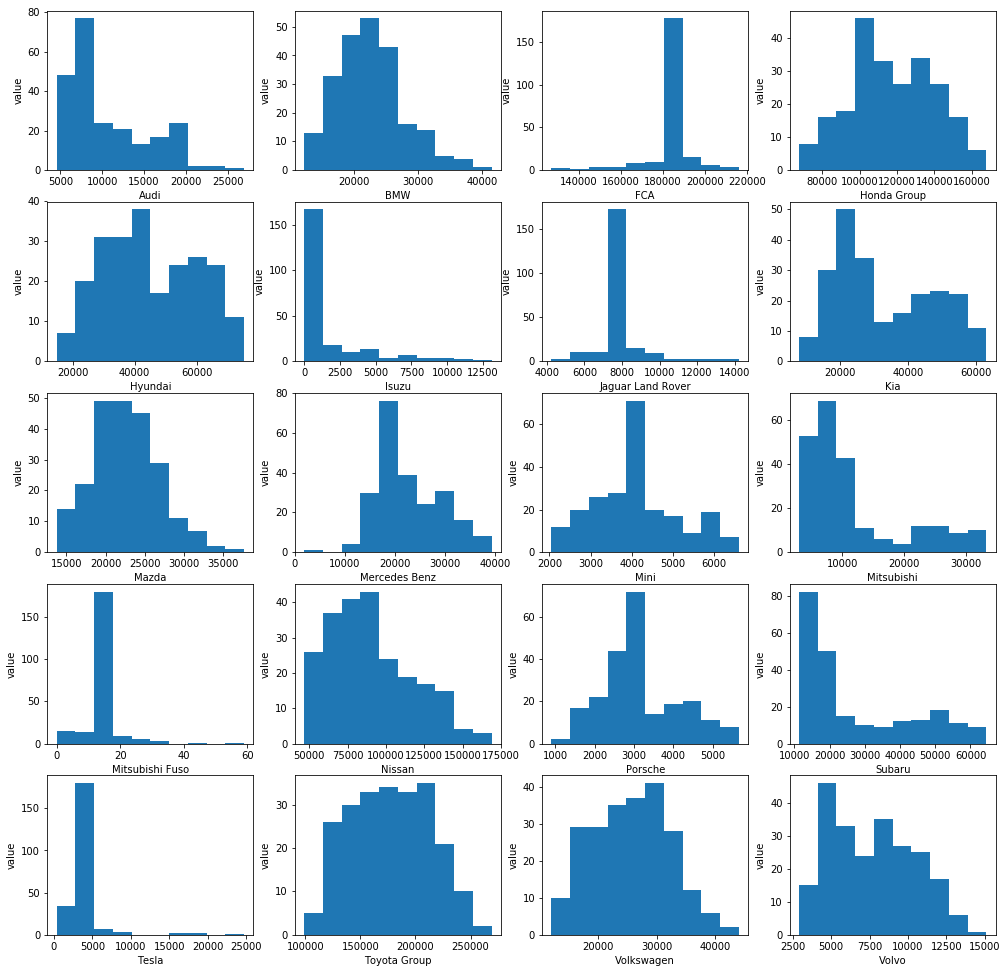

In [42]:
##### Univariate #######

col = ['Lot Frontage','Lot Area','Mas Vnr Area', 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area', 'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']

fig, ax = plt.subplots(5,4,figsize= (17,17))
k = 0
check_ = False
for i in range(5):
    for j in range(4):
        check_null = df[numeric_columns[k]].isnull().any()
        if "--" in set(df[numeric_columns[k]]):
            check_ = True
            #print("did")
        #check_ = df[numeric_columns[k]==]
        #print("=============")
        if (check_null or check_):
            #print("correct")
            p = df[numeric_columns[k]][(df[numeric_columns[k]]!= "--")].mean()
            #print("-------")
            #print(p)
            if check_:
                df[numeric_columns[k]][(df[numeric_columns[k]]== "--")]= p
            if check_null:
                df[numeric_columns[k]].fillna(df[numeric_columns[k]].mean(), inplace= True)
            #print("Replaced----------------------------------------")
            #print(df[numeric_columns[k]])
            #print("Replaced----------------------------------------")
            check_ = False
            check_null = False
            #print("######")
        
        #print(df.loc[200:201,numeric_columns[k]]) 
        #print(type(df.loc[200:200,numeric_columns[k]] ))
        #print("#######*******")
        #print(numeric_columns[k])    
        ax[i,j].hist(pd.to_numeric(df[numeric_columns[k]]))
        ax[i,j].set_ylabel('value')
        ax[i,j].set_xlabel(numeric_columns[k])
        k = k +1
        

## Average before filling the values 

Audi              17406.762712
BMW               27243.457627
Mercedes Benz     30434.677966
Honda Group      133098.813559
Hyundai           59890.440678
Isuzu               343.389831
Kia               50295.152542
Mazda             24875.966102
Mitsubishi         8260.169492
Nissan           123024.779661
Subaru            50823.423729
Toyota Group     202074.508475
Volkswagen        28759.186441
Volvo              6506.457627

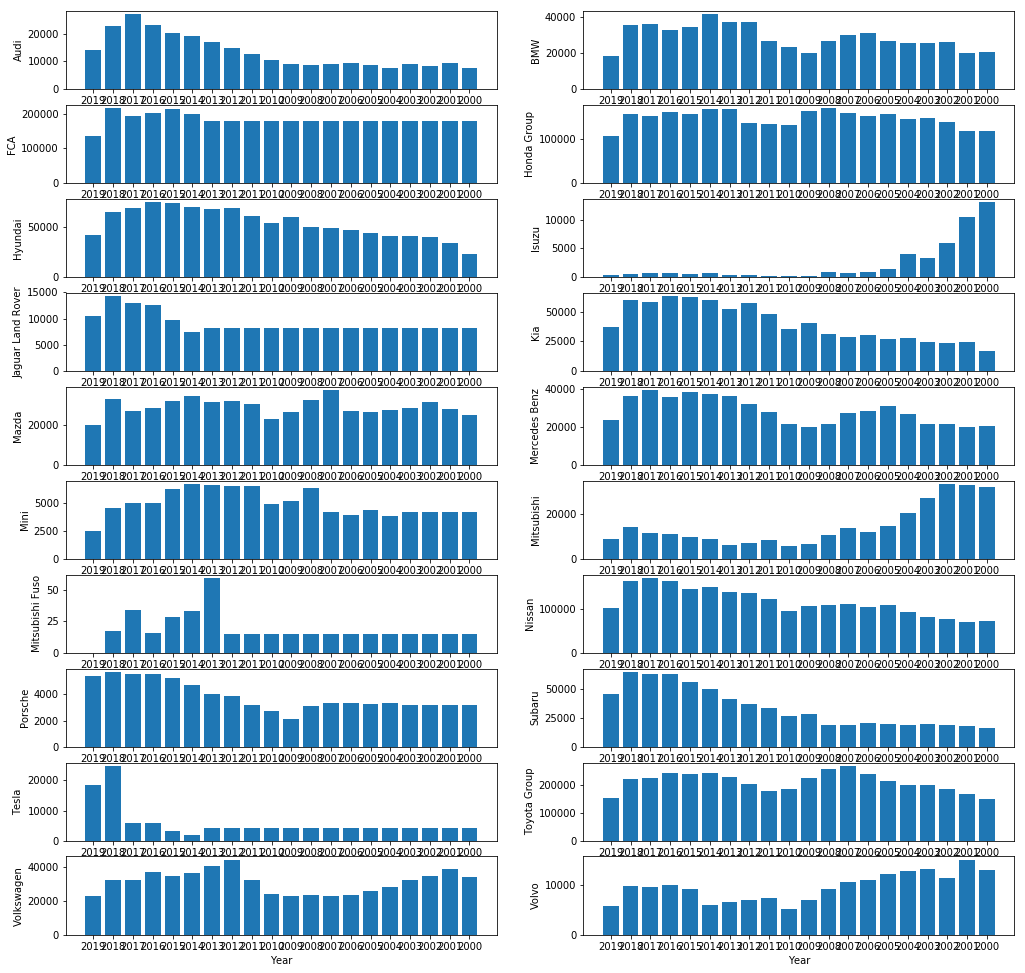

In [45]:
##### mutivariate analysis -- sales versus year--- ####
df_d['year'] = df_d['date'].apply(lambda x : x.split(" ")[1])
#print(df_d['year'])
fig, ax= plt.subplots(10,2, figsize = (17,17))
k = 0 
for i in range (10):
    for j in range(2):
        ax[i,j].bar((df_d['year']).astype('category'),df[numeric_columns[k]])
      
        ax[i,j].set_ylabel(numeric_columns[k])
        ax[i,j].set_xlabel("Year")
        k = k+1
####

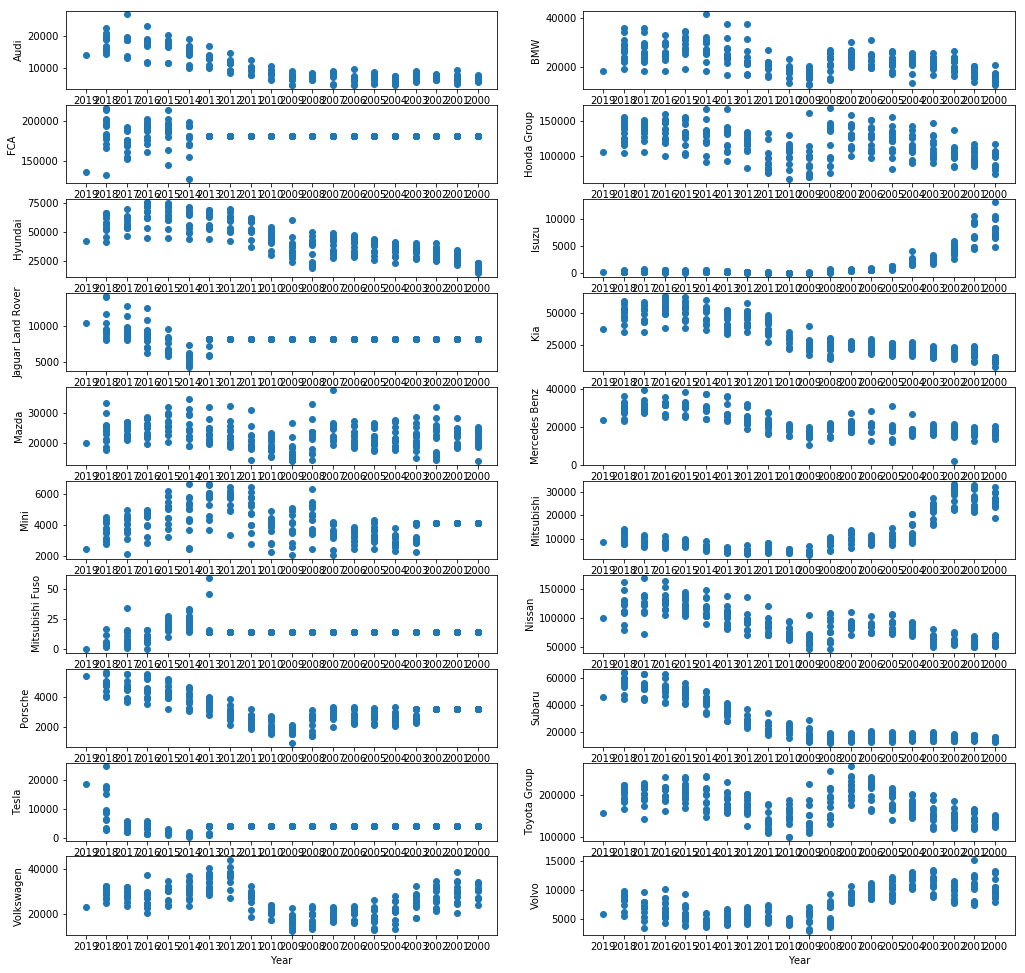

In [49]:
##### mutivariate analysis -- sales versus year--- ####
df_d['year'] = df_d['date'].apply(lambda x : x.split(" ")[1])
#print(df_d['year'])
fig, ax= plt.subplots(10,2, figsize = (17,17))
k = 0 
for i in range (10):
    for j in range(2):
        ax[i,j].scatter((df_d['year']).astype('category'),df[numeric_columns[k]])
      
        ax[i,j].set_ylabel(numeric_columns[k])
        ax[i,j].set_xlabel("Year")
        k = k+1

<BarContainer object of 229 artists>

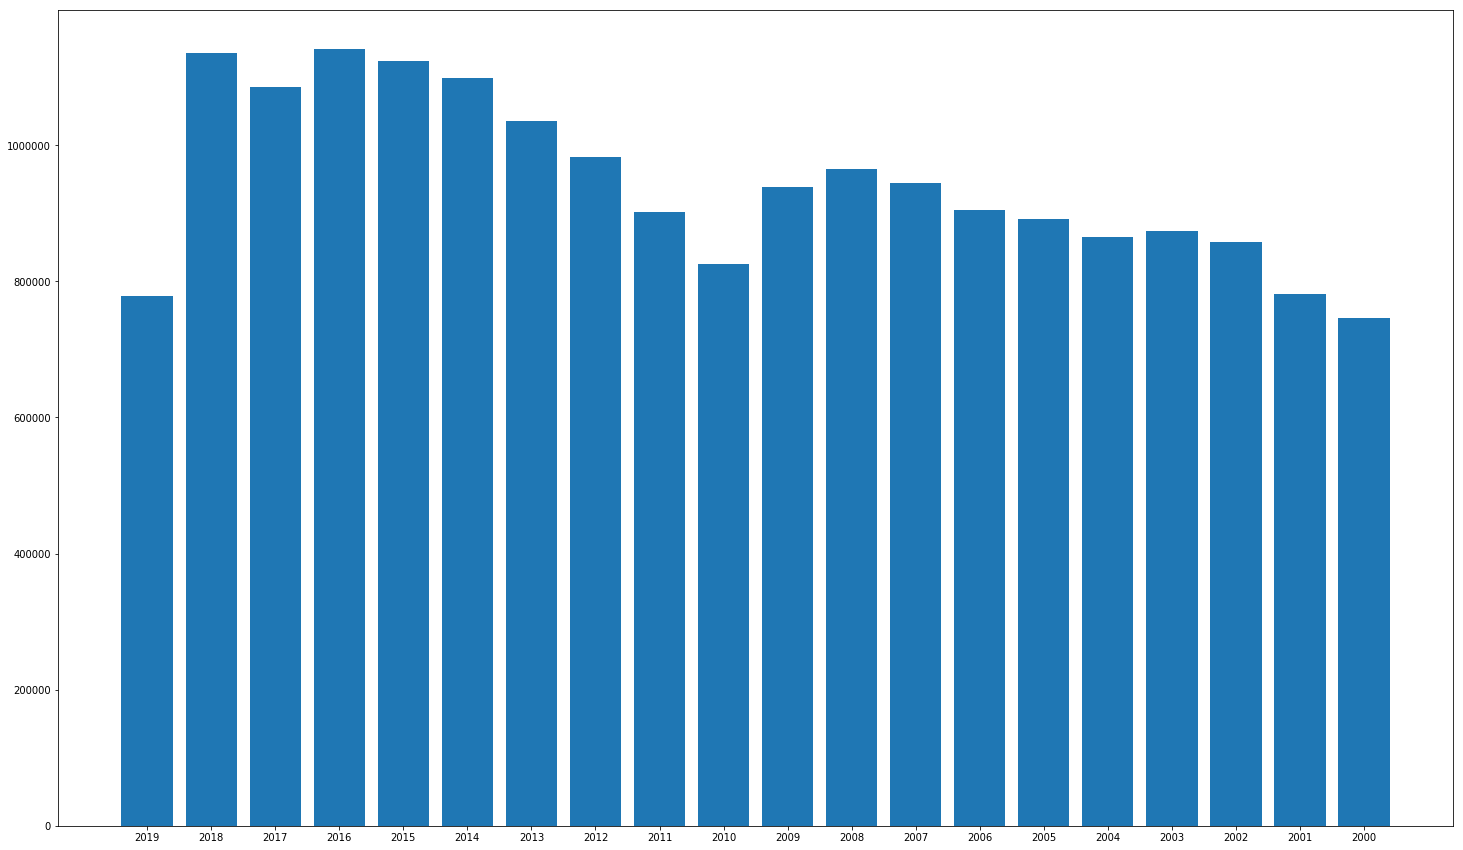

In [48]:
###### Analysis of Total sales ####
total_column =  pd.to_numeric(df['BMW'])
for i in range(1,20):
    total_column = total_column + pd.to_numeric(df[numeric_columns[i]])
plt.figure(figsize = (25,15))
plt.bar((df_d['year']).astype('category'),total_column)